In [2]:
# times series data of 5 stocks
# randomly simulate 1000 different weights
# cal the return and portfolio vol
# frontier plot
# optimize the Sharp ratio or minimize the vol

In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

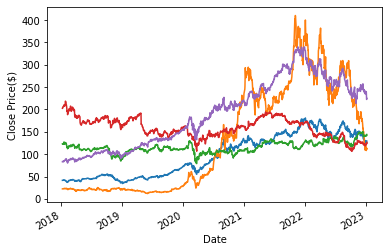

In [149]:
def histo_price(Ticker):

    Ticker = yf.Ticker(Ticker).history(period='5y')['Close']
    # print(len(Ticker))
    plt.ylabel('Close Price($)')
    Ticker.plot()
    
price1 = histo_price("AAPL")
price2 = histo_price("TSLA")
price3 = histo_price("IBM")
price4 = histo_price("MMM")
price5 = histo_price("MSFT")

In [150]:
def histo_return(Ticker):

    Ticker = yf.Ticker(Ticker).history(period='5y')['Close']
    # print(len(Ticker))
    plt.ylabel('Return')
    Ticker['Returns'] = Ticker.pct_change()
    Ticker['Returns'].plot()
    return Ticker['Returns'].dropna()

In [151]:
def portfolio_weights_random(numofstocks):
    lst = []
    summup = 0
    for i in range(numofstocks):
        weight = random.randint(1,100)
        lst.append(weight)
        summup = summup+weight
    weight_random = np.array(lst)/summup

    return weight_random

portfolio_weights_random(5)

array([0.21287129, 0.04455446, 0.17326733, 0.16336634, 0.40594059])

,AAPL,TSLA,IBM,MMM,MSFT
Date,,,,,
2018-01-09 00:00:00-05:00,-0.000115,-0.008085,0.002202,0.006214,-0.000680
2018-01-10 00:00:00-05:00,-0.000229,0.003326,0.002136,-0.000580,-0.004534
2018-01-11 00:00:00-05:00,0.005680,0.009409,0.000122,0.004852,0.002961
2018-01-12 00:00:00-05:00,0.010326,-0.005119,-0.006456,0.008914,0.017257
2018-01-16 00:00:00-05:00,-0.005082,0.011421,0.004352,0.001105,-0.013951


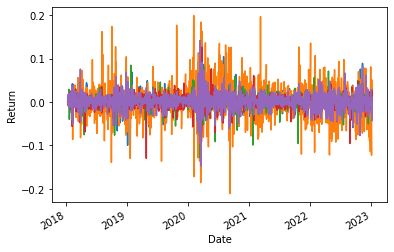

In [152]:
position1 = histo_return("AAPL")
position2 = histo_return("TSLA")
position3 = histo_return("IBM")
position4 = histo_return("MMM")
position5 = histo_return("MSFT")

# print(position1)

dic = {'AAPL': position1,
'TSLA': position2,
'IBM': position3,
'MMM': position4,
'MSFT': position5}
stockreturns = pd.DataFrame(dic)
stockreturns.head()

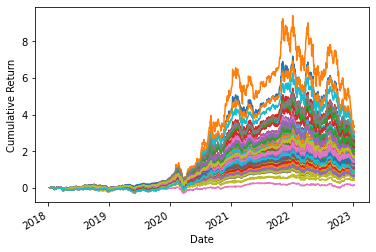

In [153]:
frontier_STD_annual = []
frontier_return_annual = []
frontier_weights = []

for i in range(100):
    # Portfolio return with Random weights
    weight_random = portfolio_weights_random(5)
    weighted_returns = stockreturns.mul(weight_random, axis=1)
    portfolio_returns = weighted_returns.sum(axis=1)
    frontier_weights.append(weight_random)

    # Plot the cumulative portfolio returns over time
    cumulative_returns = ((1+portfolio_returns).cumprod()-1)
    cumulative_returns.plot()
    plt.ylabel('Cumulative Return')

    # Annualize the STD of the portfolio
    
    portfolio_std_daily = cumulative_returns.std()
    portfolio_std_annual = portfolio_std_daily*(252**0.5)
    frontier_STD_annual.append(portfolio_std_annual)

    # Annualize the return of the portfolio
    
    portfolio_return_annual = (cumulative_returns[-1]+1)**(1/5)-1
    frontier_return_annual.append(portfolio_return_annual)

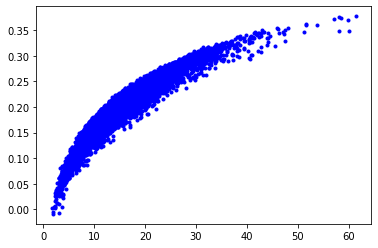

In [144]:
plt.plot(frontier_STD_annual, frontier_return_annual,'b.')
plt.show()